In [1]:
from PIL import Image
import numpy as np

In [ ]:
### 

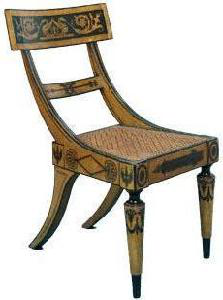

In [66]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0001.jpg")
img

In [67]:
# 배열 확인 (세로,가로,RGB)
np.array(img).shape

(300, 223, 3)

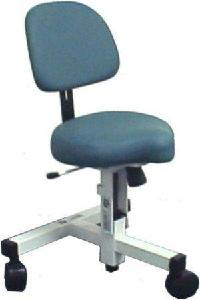

In [68]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0002.jpg")
img

In [69]:
# 배열 확인 (세로,가로,RGB)
np.array(img).shape

(300, 200, 3)

In [70]:
# 너비 해상도 구하기
np.array(img).shape[1]

200

---
## chair 전체이미지의 해상도 평균 구하기

In [71]:
import glob

In [72]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    # print(img.shape[1]) -> 잘가져왔는지 print로 찍어보기
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [73]:
print("chair의 너비 평균 해상도 :", np.mean(widthRatio))
print("chair의 높이 평균 해상도 :", np.mean(heightRatio))

chair의 너비 평균 해상도 : 230.69354838709677
chair의 높이 평균 해상도 : 296.98387096774195


In [74]:
# 갯수 확인
len(widthRatio)

62

In [75]:
# len으로 길이 확인해서 잘 들어왔는지 확인
len(widthRatio) == len(heightRatio)

True

> 너비 : 231, 높이를 : 297로 정했다!

---
## chair의 이미지 해상도 변경 및 Gray Scale로 적용하기

In [76]:
# Chair의 파일갯수(62개)와 laptop의 파일 갯수(81개)를 60개로 맞추기
i = 0
for file in sorted(glob.glob('../Data/cnn/chair/*.jpg')):
    img = Image.open(file)
    imgResize = img.resize((231,291), Image.LANCZOS) # 이미지 사이즈는 튜플로 써야됨 M1에서는 Image.Resampling.LANCZOS로도 된다.
    imgResize = imgResize.convert('L') # Grayscale, 투명도가 있는 경우에는 LA
    imgResize.save("../Data/cnn/chairNew/image_%04d.jpg"%i, 'JPEG')
    i+=1
    if i >= 60:
        break

---
## Laptop의 이미지 해상도 변경 및 Grayscale로 적용하기

In [77]:
# Chair의 파일갯수(62개)와 laptop의 파일 갯수(81개)를 60개로 맞추기
i = 0
for file in sorted(glob.glob('../Data/cnn/laptop/*.jpg')):
    img = Image.open(file)
    imgResize = img.resize((231,291), Image.LANCZOS) # 이미지 사이즈는 튜플로 써야됨 M1에서는 Image.Resampling.LANCZOS로도 된다.
    imgResize = imgResize.convert('L') # Grayscale, 투명도가 있는 경우에는 LA
    imgResize.save("../Data/cnn/laptopNew/image_%04d.jpg"%i, 'JPEG')
    i+=1
    if i >= 80:
        break

---
## Char Image를 numpy로 변경하기

In [78]:
number_of_data = 60
img_width_size = 231
img_height_size = 297

In [79]:
chairData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [80]:
chairData.shape

(60, 297, 231)

In [81]:
i = 0
for file in sorted(glob.glob('../Data/cnn/chairNew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i+=1

ValueError: could not broadcast input array from shape (291,231) into shape (297,231)

In [82]:
chairData.shape

(60, 297, 231)

AttributeError: 'AxesImage' object has no property 'cmp'

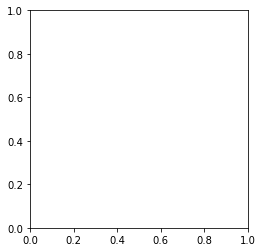

In [83]:
# 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(chairData[0].reshape(297, 231), cmp='gray')
plt.show()

---
### laptop image를 numpy로 변경하기

In [ ]:
laptopData